In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Датасет

BrandName: Марка продукта

Details: Подробные сведения о продукте

Size: Доступные размеры

MRP: Это максимальная розничная цена

SellPrice: Это цена после скидки

Category: Категория продукта

Значение Nan - это нулевое значение

In [2]:
df = pd.read_csv('F:/Рабочий стол/E-commerceProject/FashionDataset.csv')
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [4]:
df.isna().any()

Unnamed: 0    False
BrandName     False
Deatils       False
Sizes         False
MRP           False
SellPrice     False
Discount      False
Category      False
dtype: bool

# Чистка
Конвертируем SellPrice и MRP в int
Удалим слово Size во всех элементах столбца Sizes
Удалим столбцев Unnamed: 0
Удалим значения Null

In [5]:
df.replace('Nan', np.nan, inplace = True)

In [6]:
df.dropna(axis = 0, inplace = True)

In [7]:
df.nunique()

Unnamed: 0       25
BrandName       105
Deatils       15456
Sizes           936
MRP             805
SellPrice      1144
Discount         64
Category          5
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0    0
BrandName     0
Deatils       0
Sizes         0
MRP           0
SellPrice     0
Discount      0
Category      0
dtype: int64

In [9]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [10]:
df.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [11]:
df['MRP'] = df['MRP'].str.replace('Rs\n', '')
df['MRP'] = df['MRP'].astype(int)
df['SellPrice'] = df['SellPrice'].astype(int)

In [12]:
df['Sizes'] = df['Sizes'].str.replace('Size:', '')

In [13]:
df.head(5)

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


# Категории

Text(0.5, 0, 'Категория')

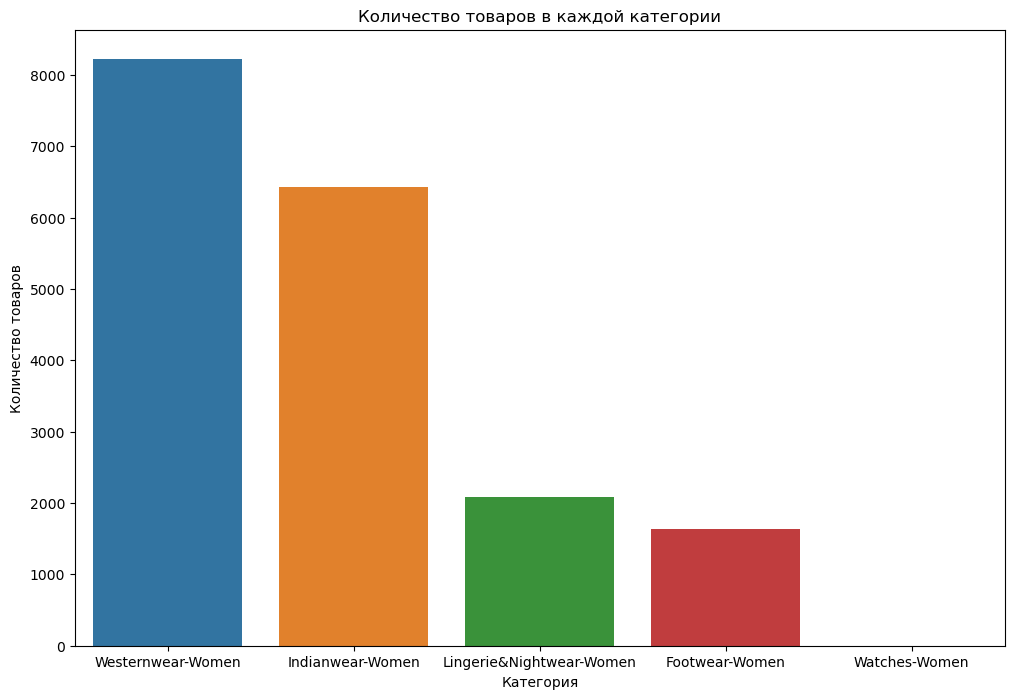

In [30]:
max_for_category = df['Category'].value_counts()
plt.figure(figsize = (12, 8))
sns.barplot(x = max_for_category.index, y = max_for_category.values)
plt.title('Количество товаров в каждой категории')
plt.ylabel('Количество товаров')
plt.xlabel('Категория')

# Скидка

Text(0.5, 0, '% Скидки')

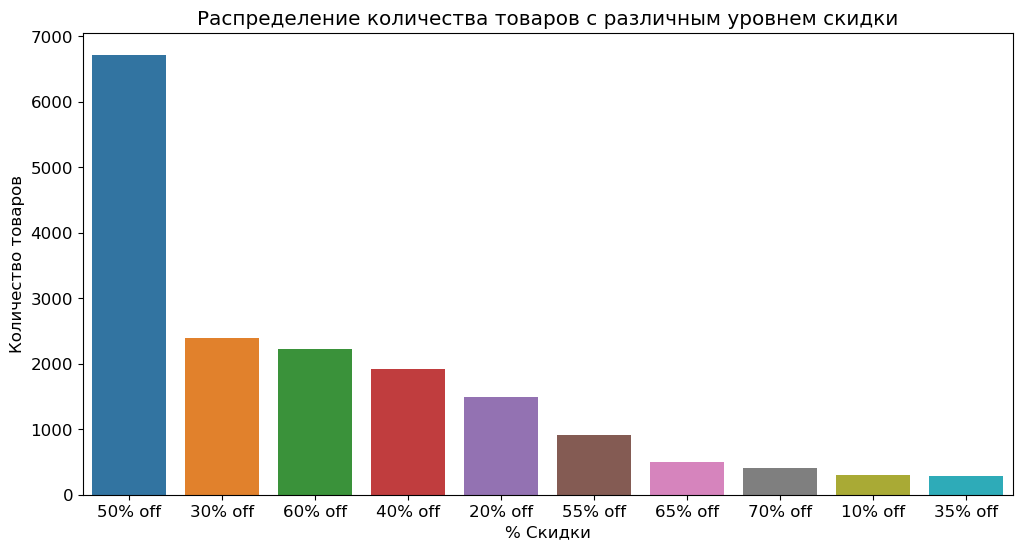

In [45]:
discount_values = df['Discount'].value_counts().head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = discount_values.index, y = discount_values.values)
plt.title('Распределение количества товаров с различным уровнем скидки')
plt.ylabel('Количество товаров')
plt.xlabel('% Скидки')

# Размер

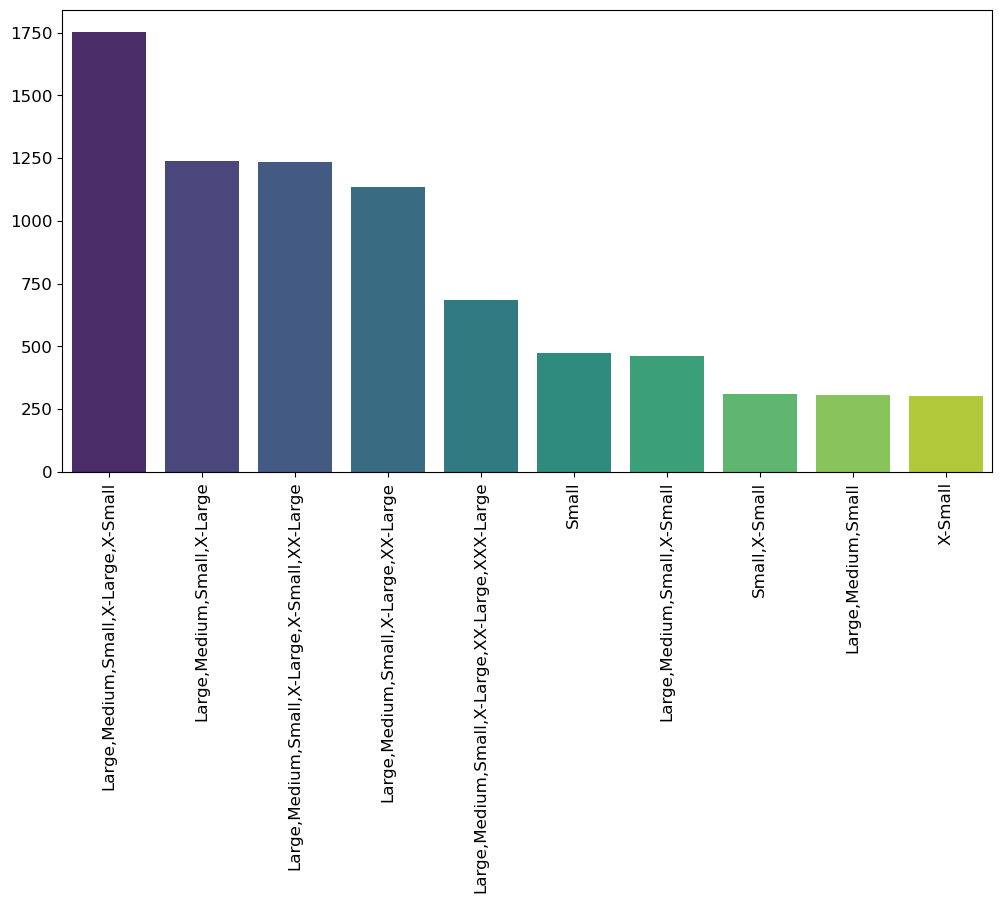

In [93]:
sizes_values = df['Sizes'].value_counts().head(10)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
sns.barplot(x = sizes_values.index, y = sizes_values.values, palette = 'viridis')
plt.show()

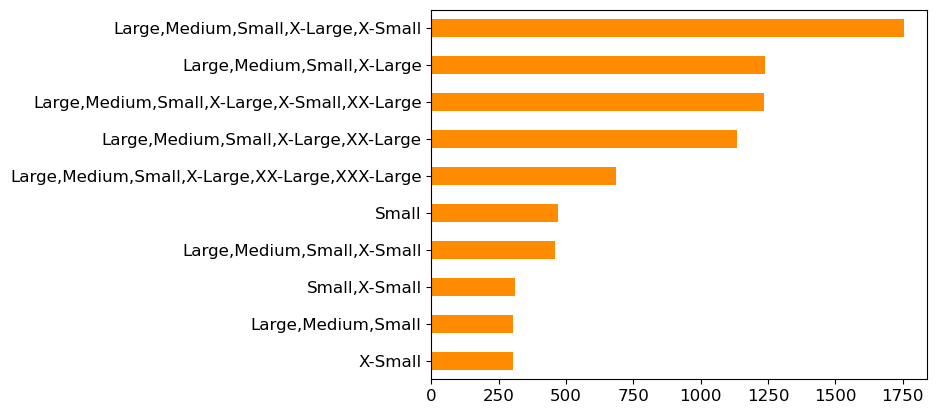

<Figure size 1500x1000 with 0 Axes>

In [104]:
sizes_values = df['Sizes'].value_counts().head(10).sort_values().plot(kind = 'barh', color = 'darkorange')
plt.figure(figsize = (15,10))
plt.show()

# Топ 10 продаж по цене продажи

In [49]:
hp = df[['BrandName', 'SellPrice', 'Category']].sort_values(
    by = 'SellPrice', ascending = False).head(10)
hp.style.background_gradient(cmap = 'coolwarm')

,BrandName,SellPrice,Category
15744,global desi,13599,Indianwear-Women
14154,global desi,12799,Indianwear-Women
18629,w,7499,Indianwear-Women
24281,new balance,6999,Footwear-Women
24641,new balance,6999,Footwear-Women
25635,new balance,6999,Footwear-Women
24742,new balance,6999,Footwear-Women
14053,w,6749,Indianwear-Women
16718,w,6749,Indianwear-Women
15053,w,6749,Indianwear-Women


**Можем заметить 3 названия брендов: global desi, w, new balance. Углубимся, чтобы узнать больше о самом дорогом бренде

C:\Users\user\AppData\Local\Temp\ipykernel_6344\1973979050.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_brands = df.groupby('BrandName')['MRP', 'SellPrice'].max().sort_values(by= 'SellPrice', ascending = False).head(10)


<Axes: title={'center': 'Топ 10 брендов по цене продажи после скидки'}, ylabel='BrandName'>

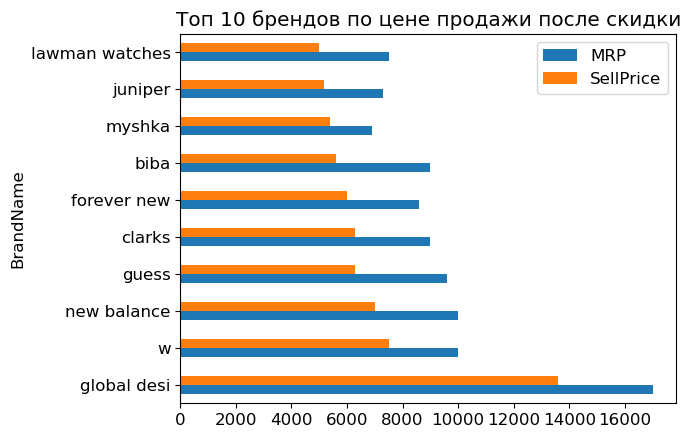

In [202]:
top_brands = df.groupby('BrandName')['MRP', 'SellPrice'].max().sort_values(by= 'SellPrice', ascending = False).head(10)
top_brands.plot(kind = 'barh', title = 'Топ 10 брендов по цене продажи после скидки')

# Сколько значений самых дорогих брендов в топ 10 продаж

[Text(0, 0, '4.0'), Text(0, 0, '4.0'), Text(0, 0, '2.0')]

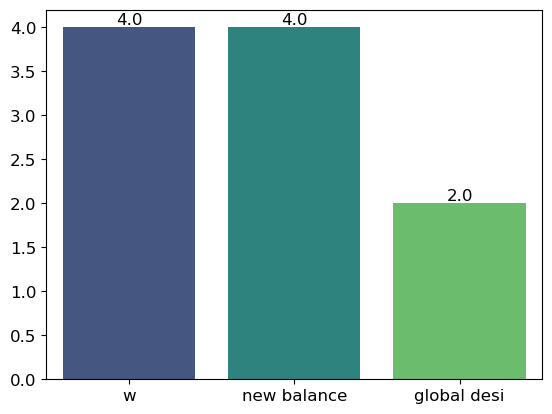

In [176]:
brand_cost = hp['BrandName'].value_counts()
ax = sns.barplot(x = brand_cost.index, y = brand_cost.values, palette = 'viridis')
ax.bar_label(ax.containers[0], fmt='%.1f')

In [174]:
data_top_brand = df.loc[df['BrandName'].isin(brand_cost.unique())]
data_top_brand.head(3)

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
1059,global desi,womens regular fit geometric top - sage,"XL,Large,Small,X-Small,XX-Large",1699,509,70% off,Westernwear-Women
1614,global desi,womens self pattern tunic - mustard,"XL,Large,Medium,Small,X-Small,XX-Large",2199,659,70% off,Westernwear-Women
1940,global desi,self design cotton blend square neck womens st...,"XL,Medium,Small,X-Small",1999,999,50% off,Westernwear-Women


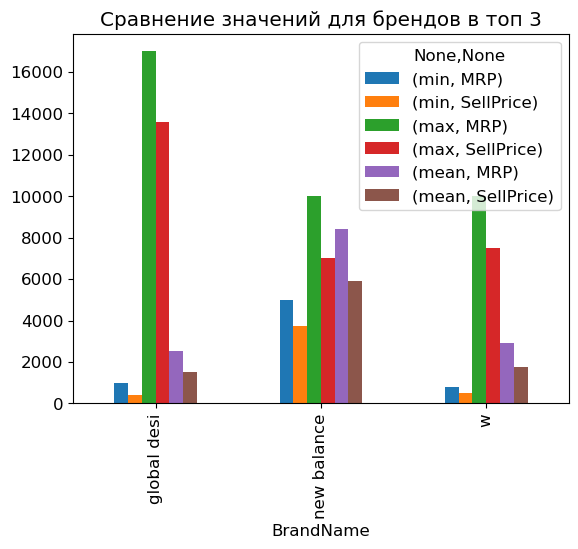

In [179]:
pvt = data_top_brand.loc[:, ['BrandName', 'MRP', 'SellPrice']].pivot_table(
    index = 'BrandName', aggfunc = ['min','max',
                                    'mean',]).plot(kind = 'bar', title = 'Сравнение значений для брендов в топ 3' )

**Интересно заметить, что у бренда global desi самая высокая розничная цена, цена после скидки и при этом имеется самый низкий показатель цены после скидки, самые низкие средние значения по сравнению с другими брендами